# Анализ COVID-19

In [75]:
import pandas as pd 
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import random
import math
import time
import datetime
from PIL import Image # конвертирование изображения в массив
import matplotlib.patches as mpatches 
import folium # создание карт
%matplotlib inline
import warnings
mpl.style.use('seaborn') 
warnings.filterwarnings("ignore")

# Датасет

Эти данные получены из репозитория для новой визуальной информационной панели коронавируса 2019 года, управляемой Университетским центром системных исследований и инженерии имени Джона Хопкинса (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [76]:
### Выбераем вчерашнюю дату, так как в отчете приводятся цифры за предыдущий день.
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'
df = pd.read_csv(file_path, error_bad_lines=False)

In [77]:
df.head()

FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-05-27 02:32:31   
1  22001.0     Acadia       Louisiana             US  2020-05-27 02:32:31   
2  51001.0   Accomack        Virginia             US  2020-05-27 02:32:31   
3  16001.0        Ada           Idaho             US  2020-05-27 02:32:31   
4  19001.0      Adair            Iowa             US  2020-05-27 02:32:31   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707         35       0          0      35   
1  30.295065  -92.414197        395      18          0     377   
2  37.767072  -75.632346        758      11          0     747   
3  43.452658 -116.241552        796      23          0     773   
4  41.330756  -94.471059          7       0          0       7   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  
3                 Ada, Idaho, US  
4                Adair, Iowa, US

In [78]:
# Заразившиеся страны
countries = df['Country_Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  188
['US', 'Italy', 'Brazil', 'Mexico', 'Canada', 'Spain', 'United Kingdom', 'China', 'Chile', 'Netherlands', 'Australia', 'Germany', 'Denmark', 'France', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada', 'Guatemala', '

In [79]:
print ('data dimensions:', df.shape)

data dimensions: (3410, 12)


In [80]:
### Проверка на NaN
df.isna().any()

FIPS               True
Admin2             True
Province_State     True
Country_Region    False
Last_Update       False
Lat                True
Long_              True
Confirmed         False
Deaths            False
Recovered         False
Active            False
Combined_Key      False
dtype: bool

In [81]:
df.fillna(0, inplace=True)
df_countries = df.drop(['FIPS','Lat','Long_','Admin2','Province_State','Last_Update','Combined_Key'], axis=1)
df_countries.rename (columns = {'Country_Region':'Country'}, inplace = True)
df_countries = df_countries[['Country','Confirmed','Active','Recovered','Deaths']]
df_countries_grouped=df_countries.groupby('Country').sum()
df_countries.set_index('Country', inplace=True)

In [82]:
print ('Размеры данных:', df_countries_grouped.shape)

Размеры данных: (188, 4)


In [83]:
# Посмотрим на получившиеся данные
df_countries_grouped.head()

Confirmed  Active  Recovered  Deaths
Country                                          
Afghanistan      11831   10483       1128     220
Albania           1029     193        803      33
Algeria           8697    3162       4918     617
Andorra            763      36        676      51
Angola              70      48         18       4

In [84]:
%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)

In [85]:
fig = px.treemap(df.sort_values(by='Confirmed', ascending=False).reset_index(drop=True), 
                 path=["Country_Region"], values="Confirmed", 
                 title='Число заразившихся',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

In [86]:
fig = px.treemap(df.sort_values(by='Active', ascending=False).reset_index(drop=True), 
                 path=["Country_Region"], values="Active", 
                 title='Количество зараженных случаев',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

In [87]:
fig = px.treemap(df.sort_values(by='Recovered', ascending=False).reset_index(drop=True), 
                 path=["Country_Region"], values="Recovered", 
                 title='Количество обнаруженных случаев',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

In [88]:
fig = px.treemap(df.sort_values(by='Deaths', ascending=False).reset_index(drop=True), 
                 path=["Country_Region"], values="Deaths", 
                 title='Количество смертей',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

In [89]:
world_cases = []
total_active = []
total_recovered = [] 
total_deaths = [] 
recovery_rate = [] 
mortality_rate = []

confirmed_sum = df.Confirmed.sum()
active_sum=df.Active.sum()
recovered_sum = df.Recovered.sum()
death_sum = df.Deaths.sum()
world_cases.append(confirmed_sum)
total_active.append(active_sum)
total_recovered.append(recovered_sum)
total_deaths.append(death_sum)
recovery_rate.append(recovered_sum/confirmed_sum)
mortality_rate.append(death_sum/confirmed_sum)
mean_mortality_rate = np.mean(mortality_rate)
mean_recovery_rate = np.mean(recovery_rate)

In [90]:
print ('Total Confirmed Cases= '+ str(confirmed_sum))
print ('Total Active Cases= '+ str(active_sum))
print ('Total Recovered Cases= '+ str(recovered_sum))
print ('Total Deaths Cases= '+ str(death_sum))
print ('Total Recovery Rate(%)= '+ str(mean_recovery_rate*100))
print ('Total Fatality Rate(%)= '+ str(mean_mortality_rate*100))

Total Confirmed Cases= 5589626
Total Active Cases= 2983847
Total Recovered Cases= 2286956
Total Deaths Cases= 350453
Total Recovery Rate(%)= 40.91429372913322
Total Fatality Rate(%)= 6.269703912211658


In [91]:
### Вывод всех зараженных случаев
df_countries_grouped = df_countries_grouped.sort_values('Confirmed', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

In [92]:
### Вывод с большим количеством зараженные (текущий)
df_countries_grouped = df_countries_grouped.sort_values('Active', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

In [93]:
### Вывод стран с наибольшим количеством выздоровевших
df_countries_grouped = df_countries_grouped.sort_values('Recovered', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

In [94]:
### Вывод стран с наибольшим количеством смертей
df_countries_grouped = df_countries_grouped.sort_values('Deaths', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

In [95]:
### Вывод стран без случаев смерти
df_countries_grouped = df_countries_grouped.sort_values('Deaths', ascending=False)
df_countries_grouped.tail(10).style.background_gradient(cmap='Blues')

In [96]:
### Вывод стран без выздоровевших случаев
df_countries_grouped = df_countries_grouped.sort_values('Recovered', ascending=False)
df_countries_grouped.tail(10).style.background_gradient(cmap='Blues')

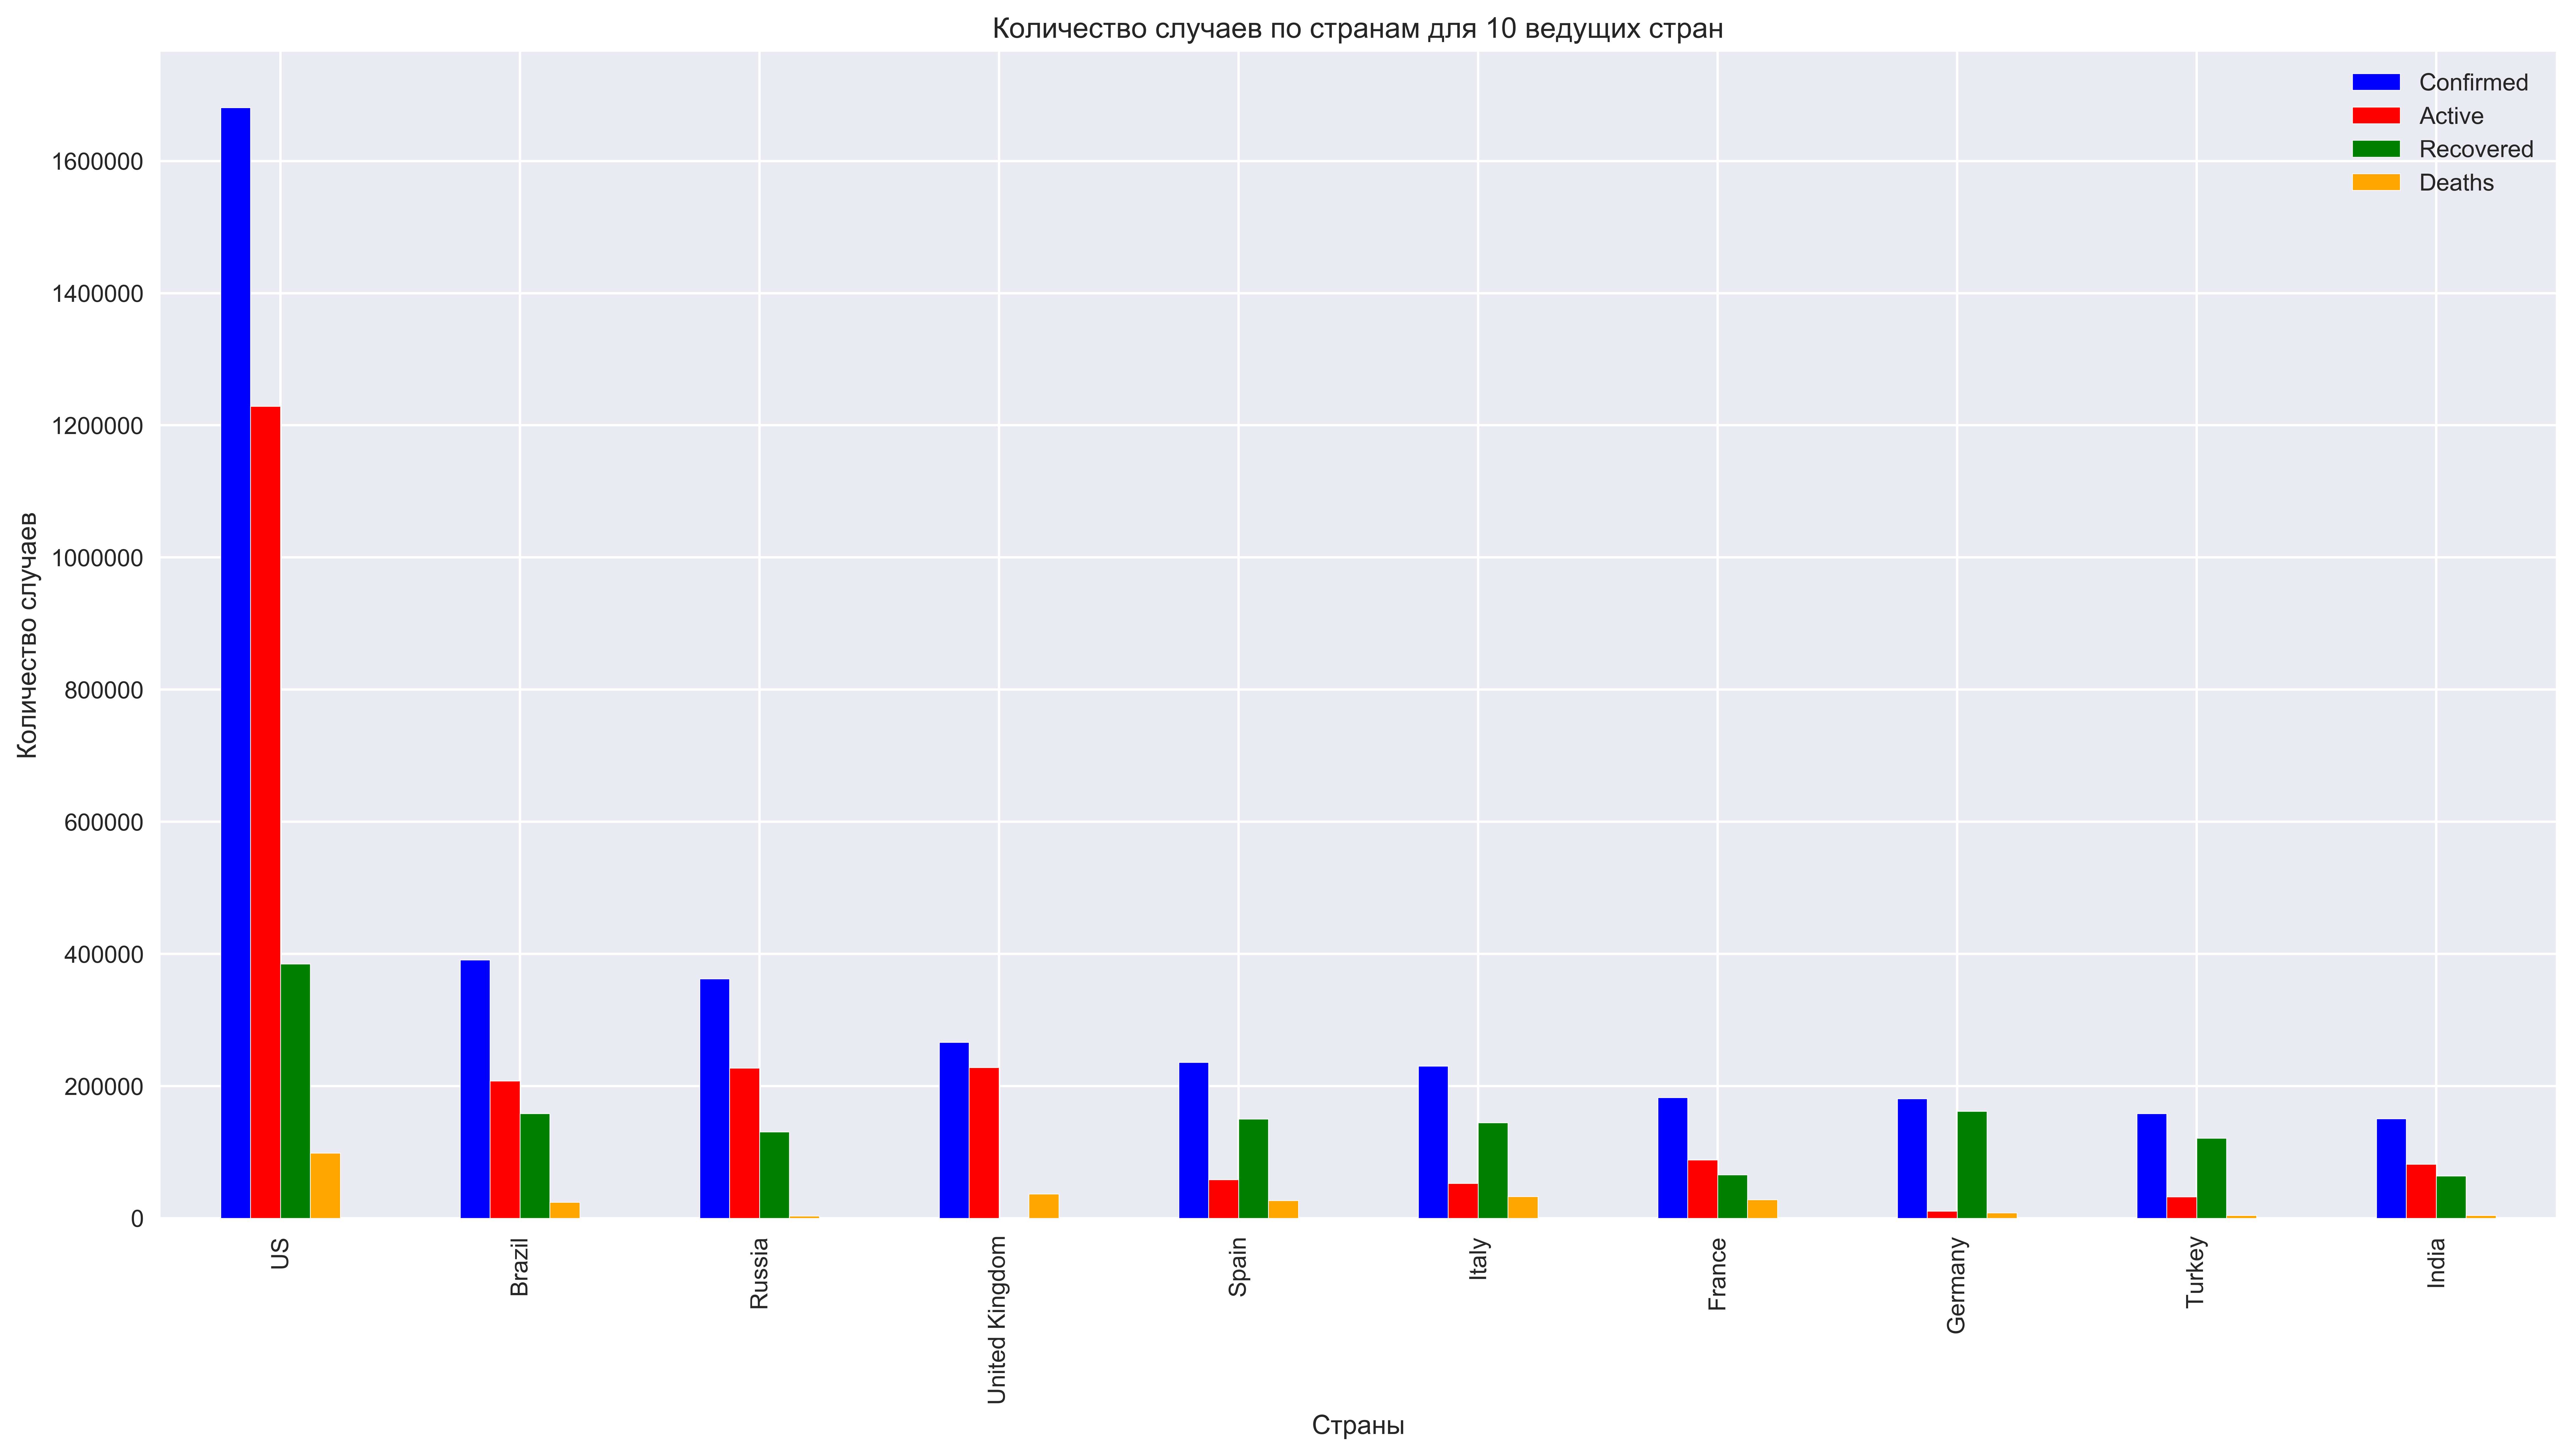

In [97]:
df_countries_grouped.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
df_countries_top = df_countries_grouped.head(10)
df_countries_top.plot(kind='bar', figsize=(18, 9), stacked=False, 
            color=['blue', 'red', 'green', 'orange'])
plt.title('Количество случаев по странам для 10 ведущих стран')
plt.ylabel('Количество случаев')
plt.xlabel('Страны')
plt.show()

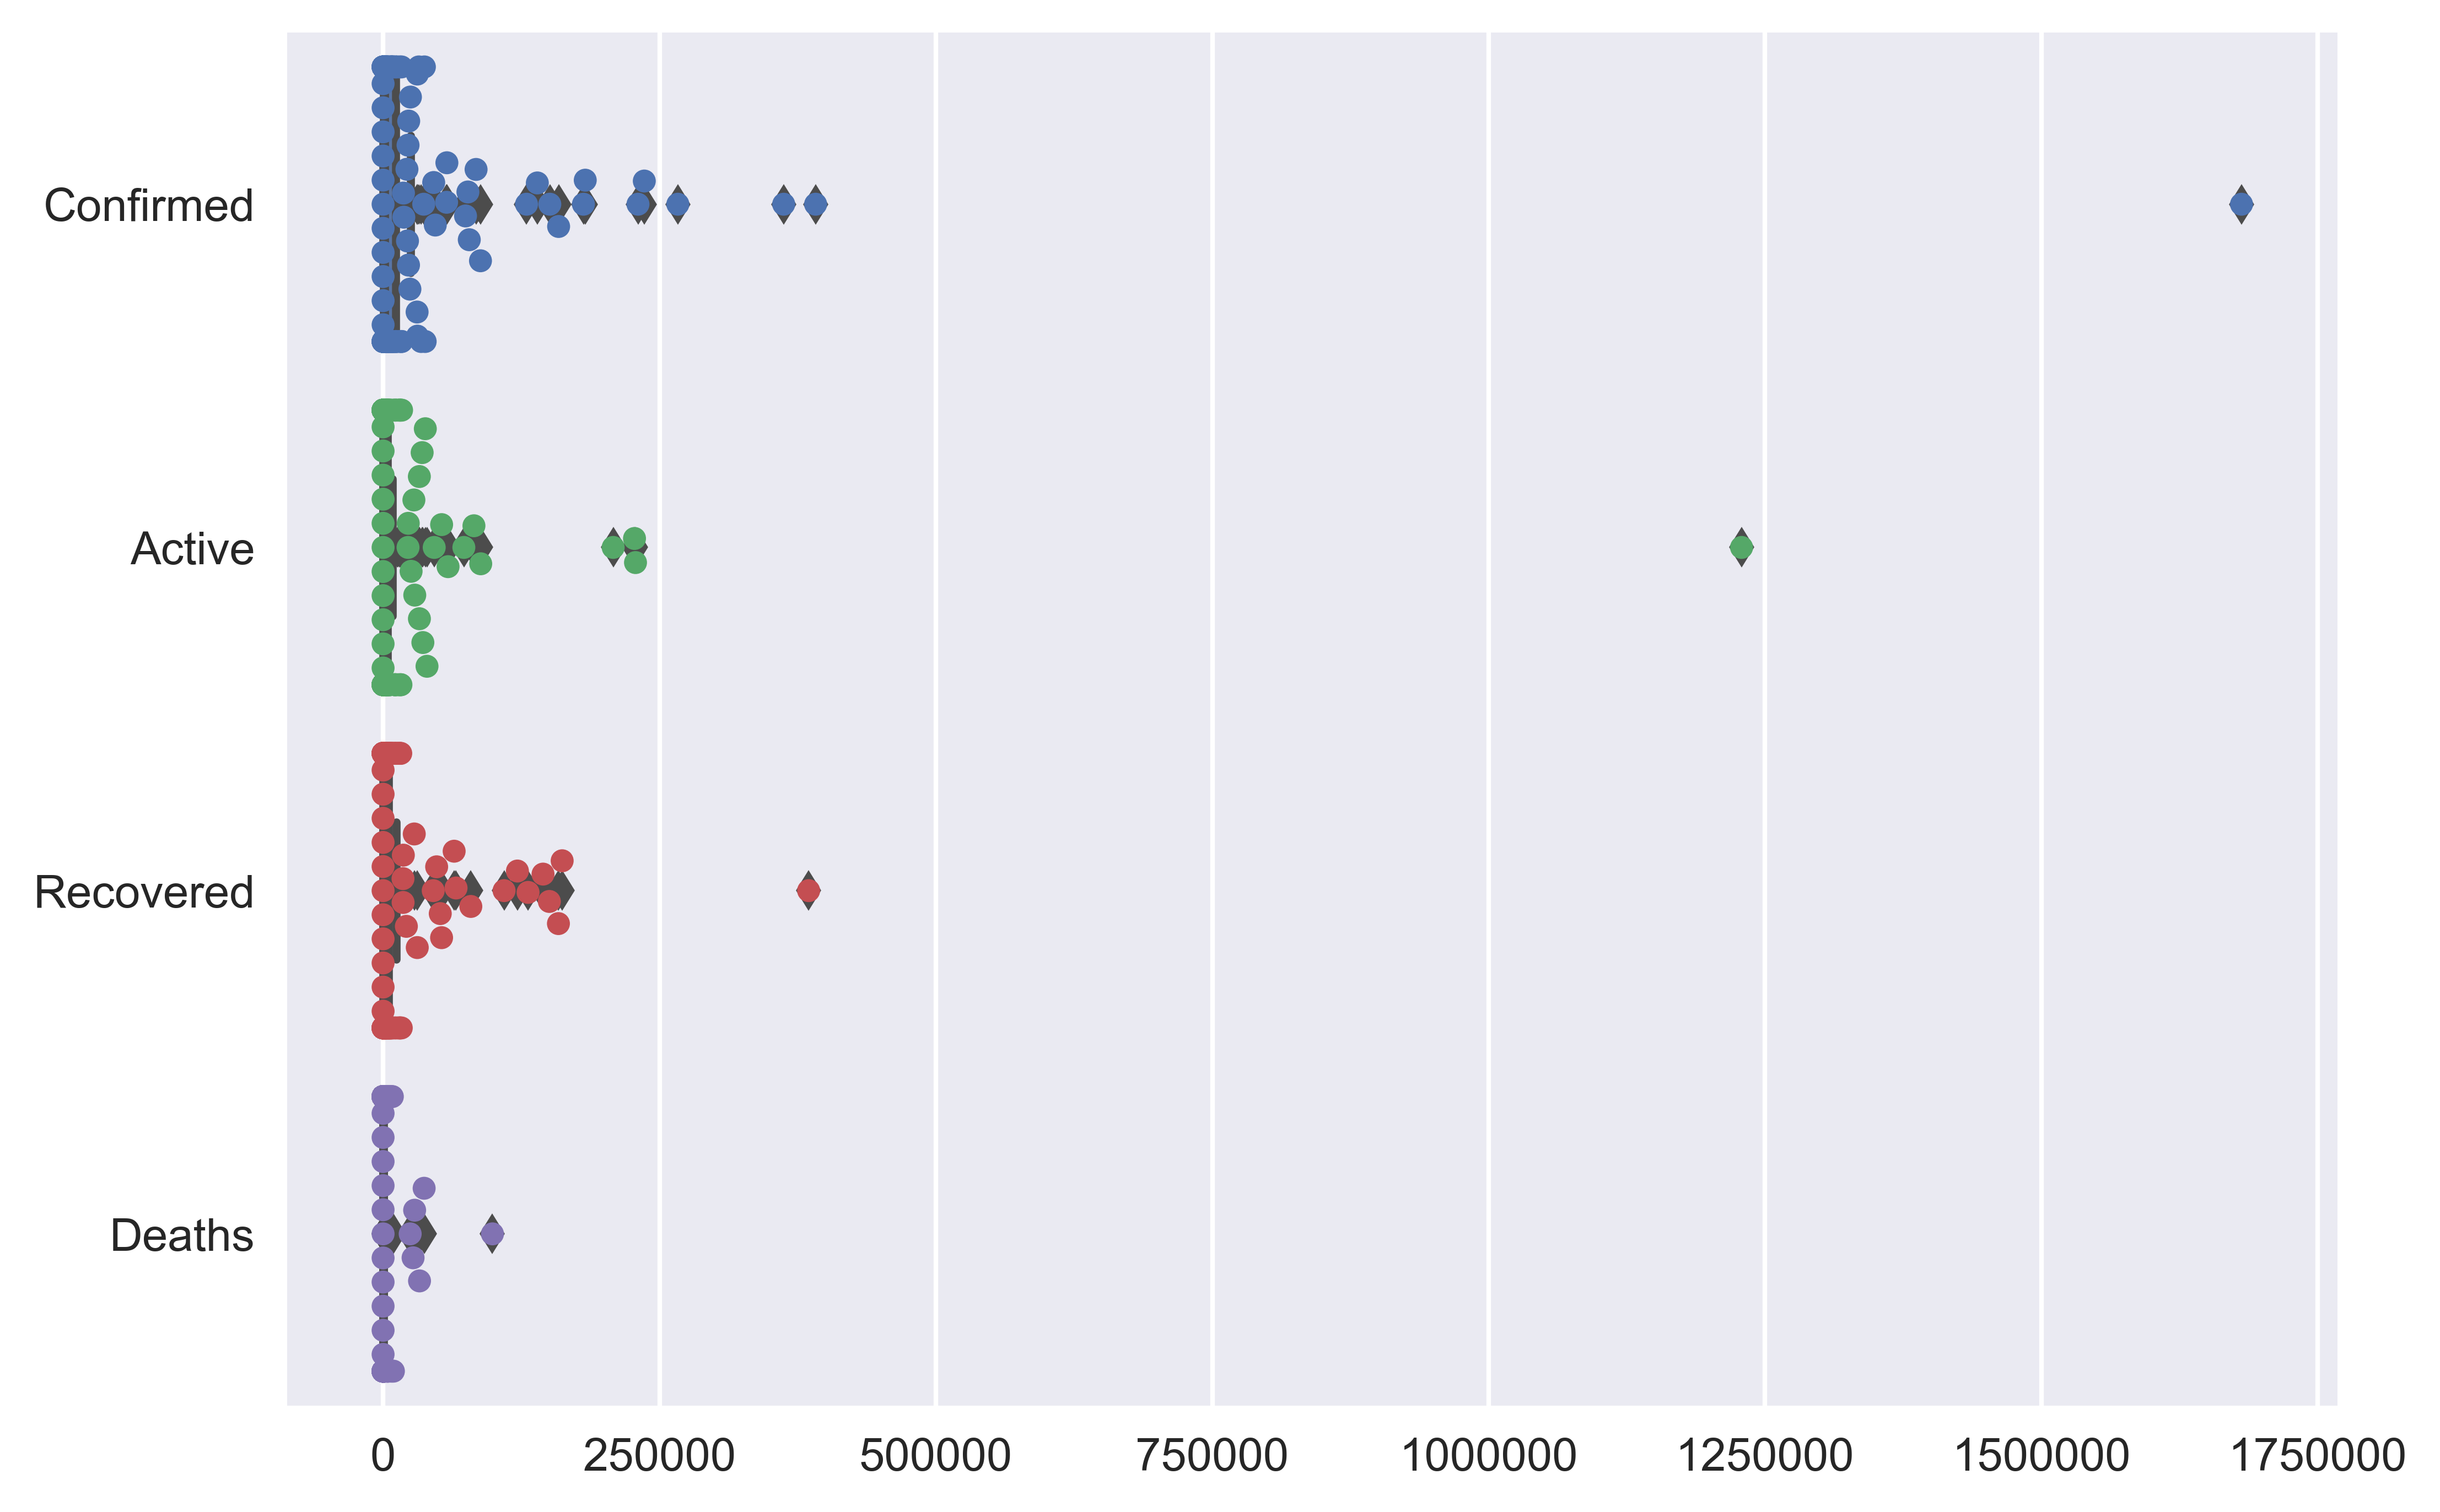

In [98]:
ax = sns.boxplot(data=df_countries_grouped, orient="h")
ax = sns.swarmplot(data=df_countries_grouped, orient="h")

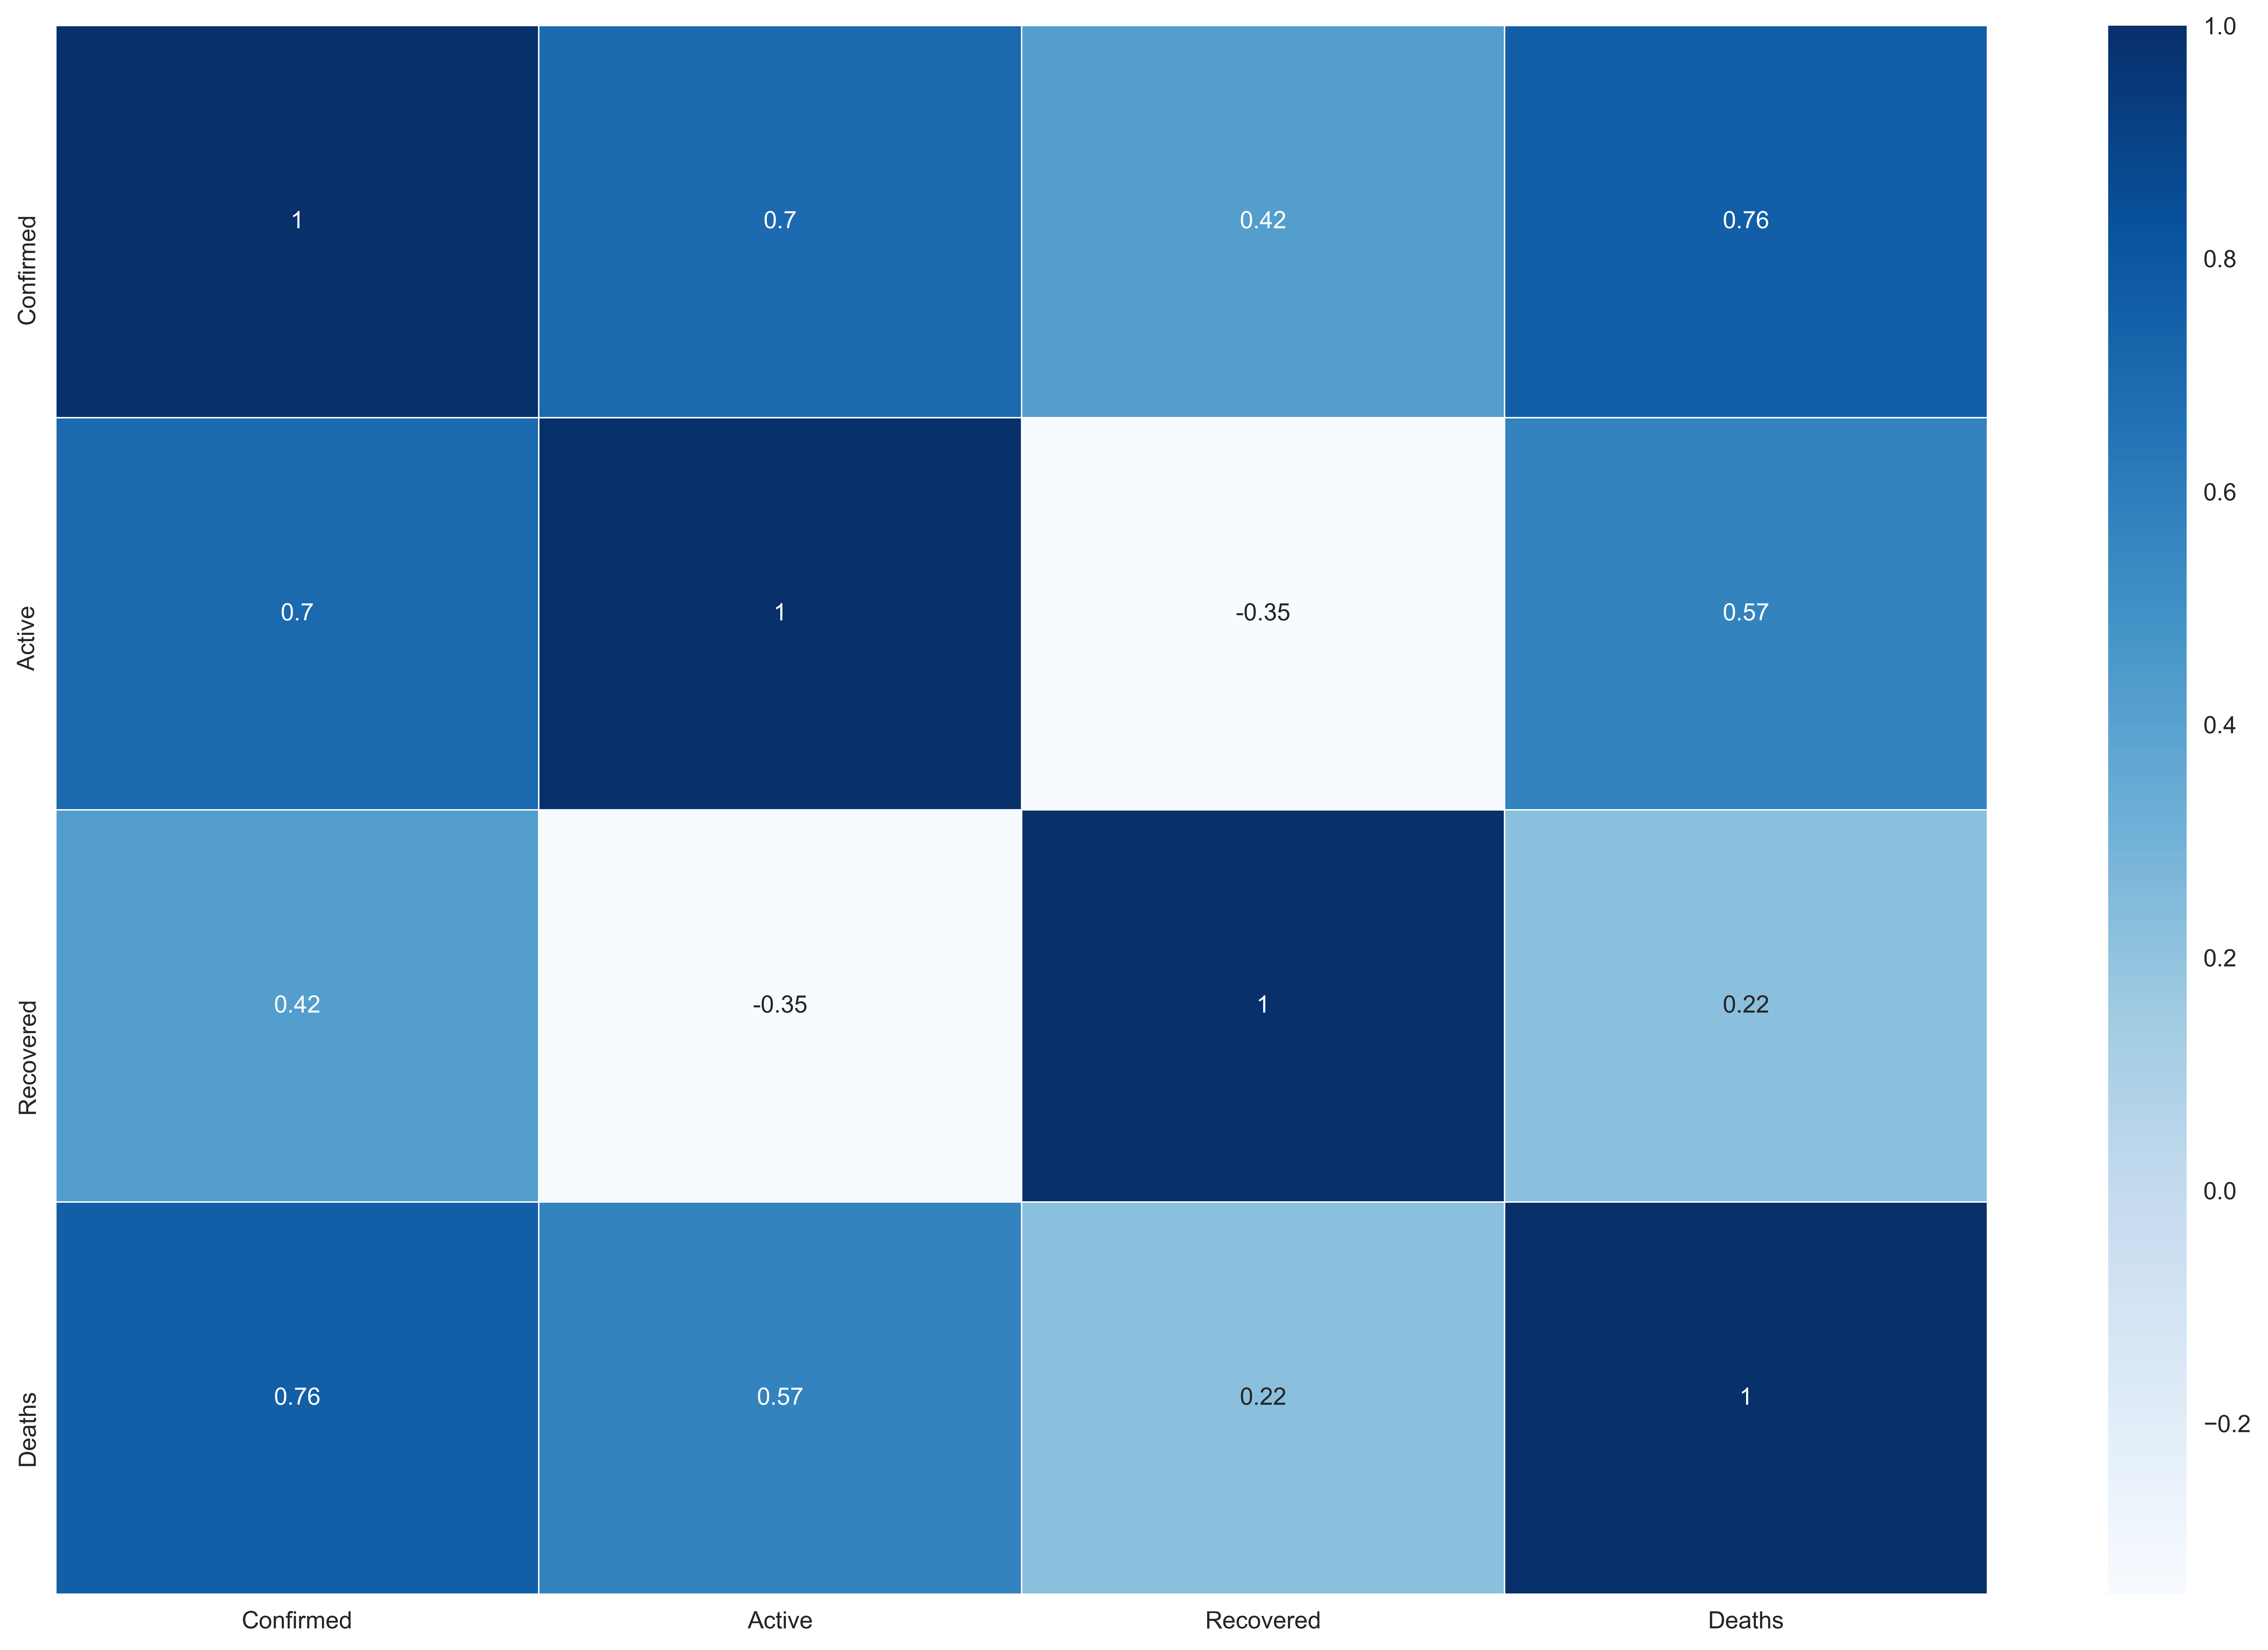

In [99]:
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_countries.corr(), annot=True, linewidths=.5, cmap="Blues")

In [100]:
sns.pairplot(df_countries_grouped[['Confirmed','Deaths','Recovered','Active']], diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, palette="husl",
             size = 4);

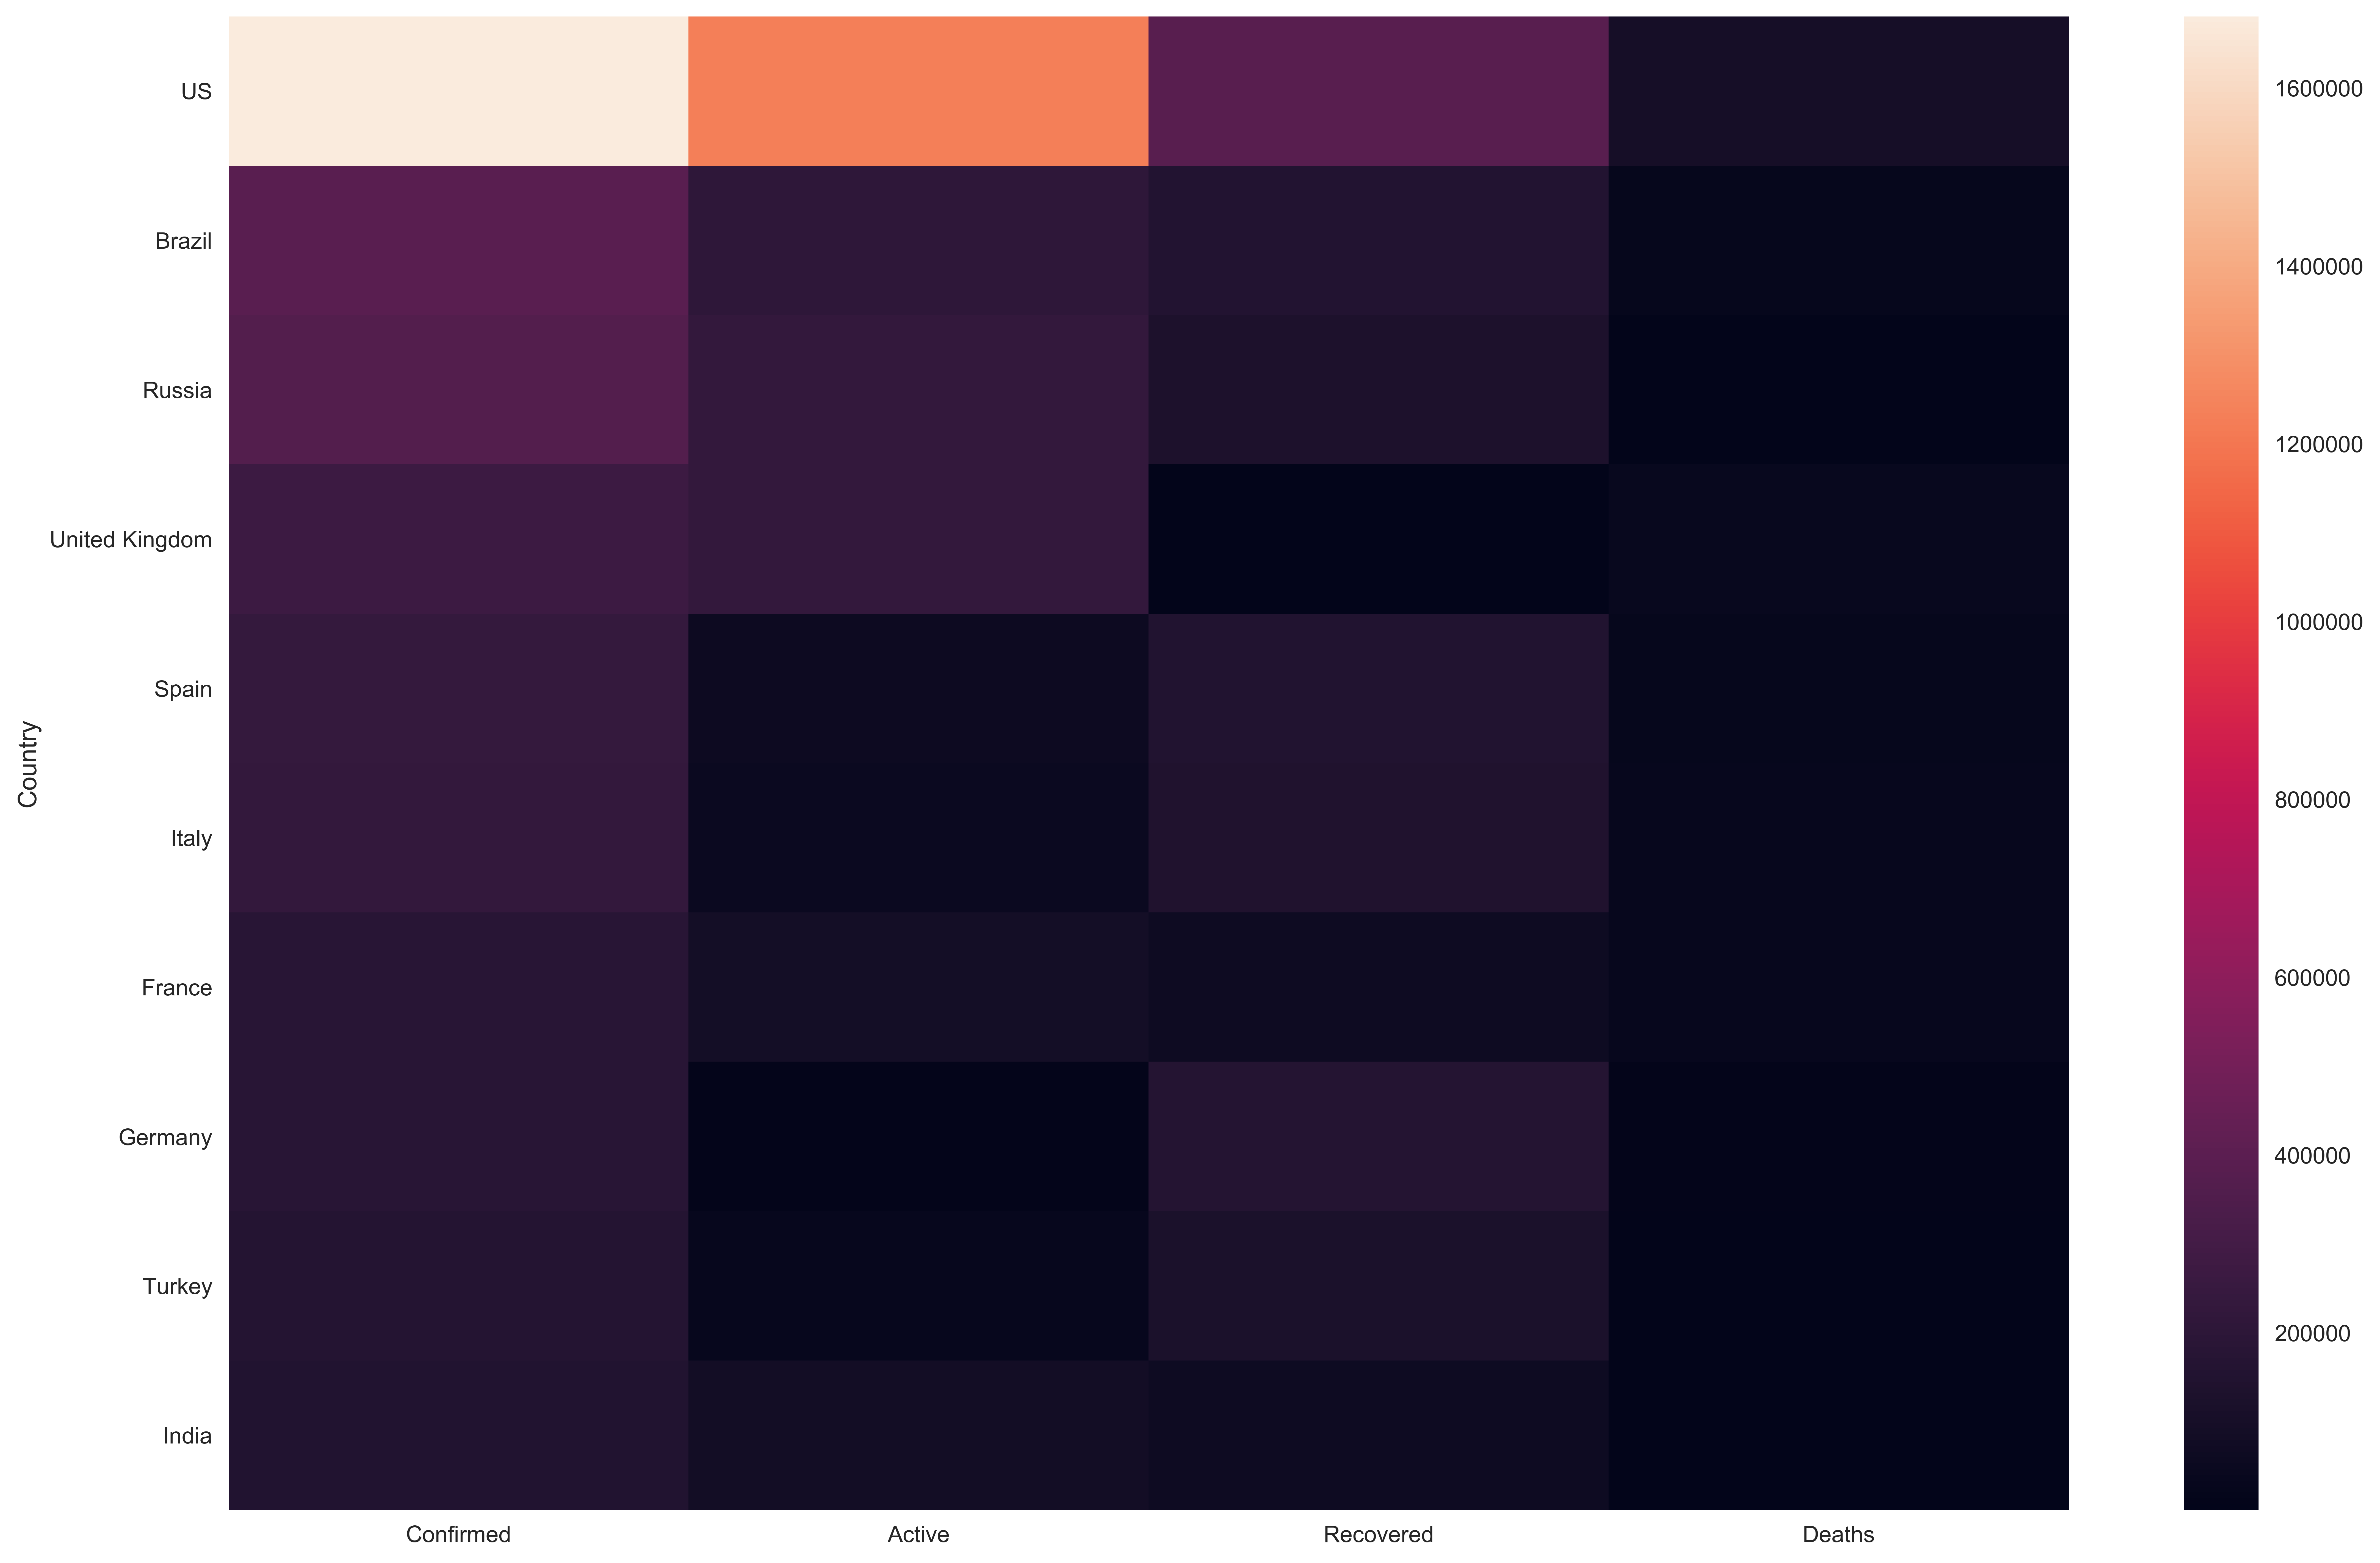

In [101]:
sns.set_style("darkgrid")
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_countries_top)

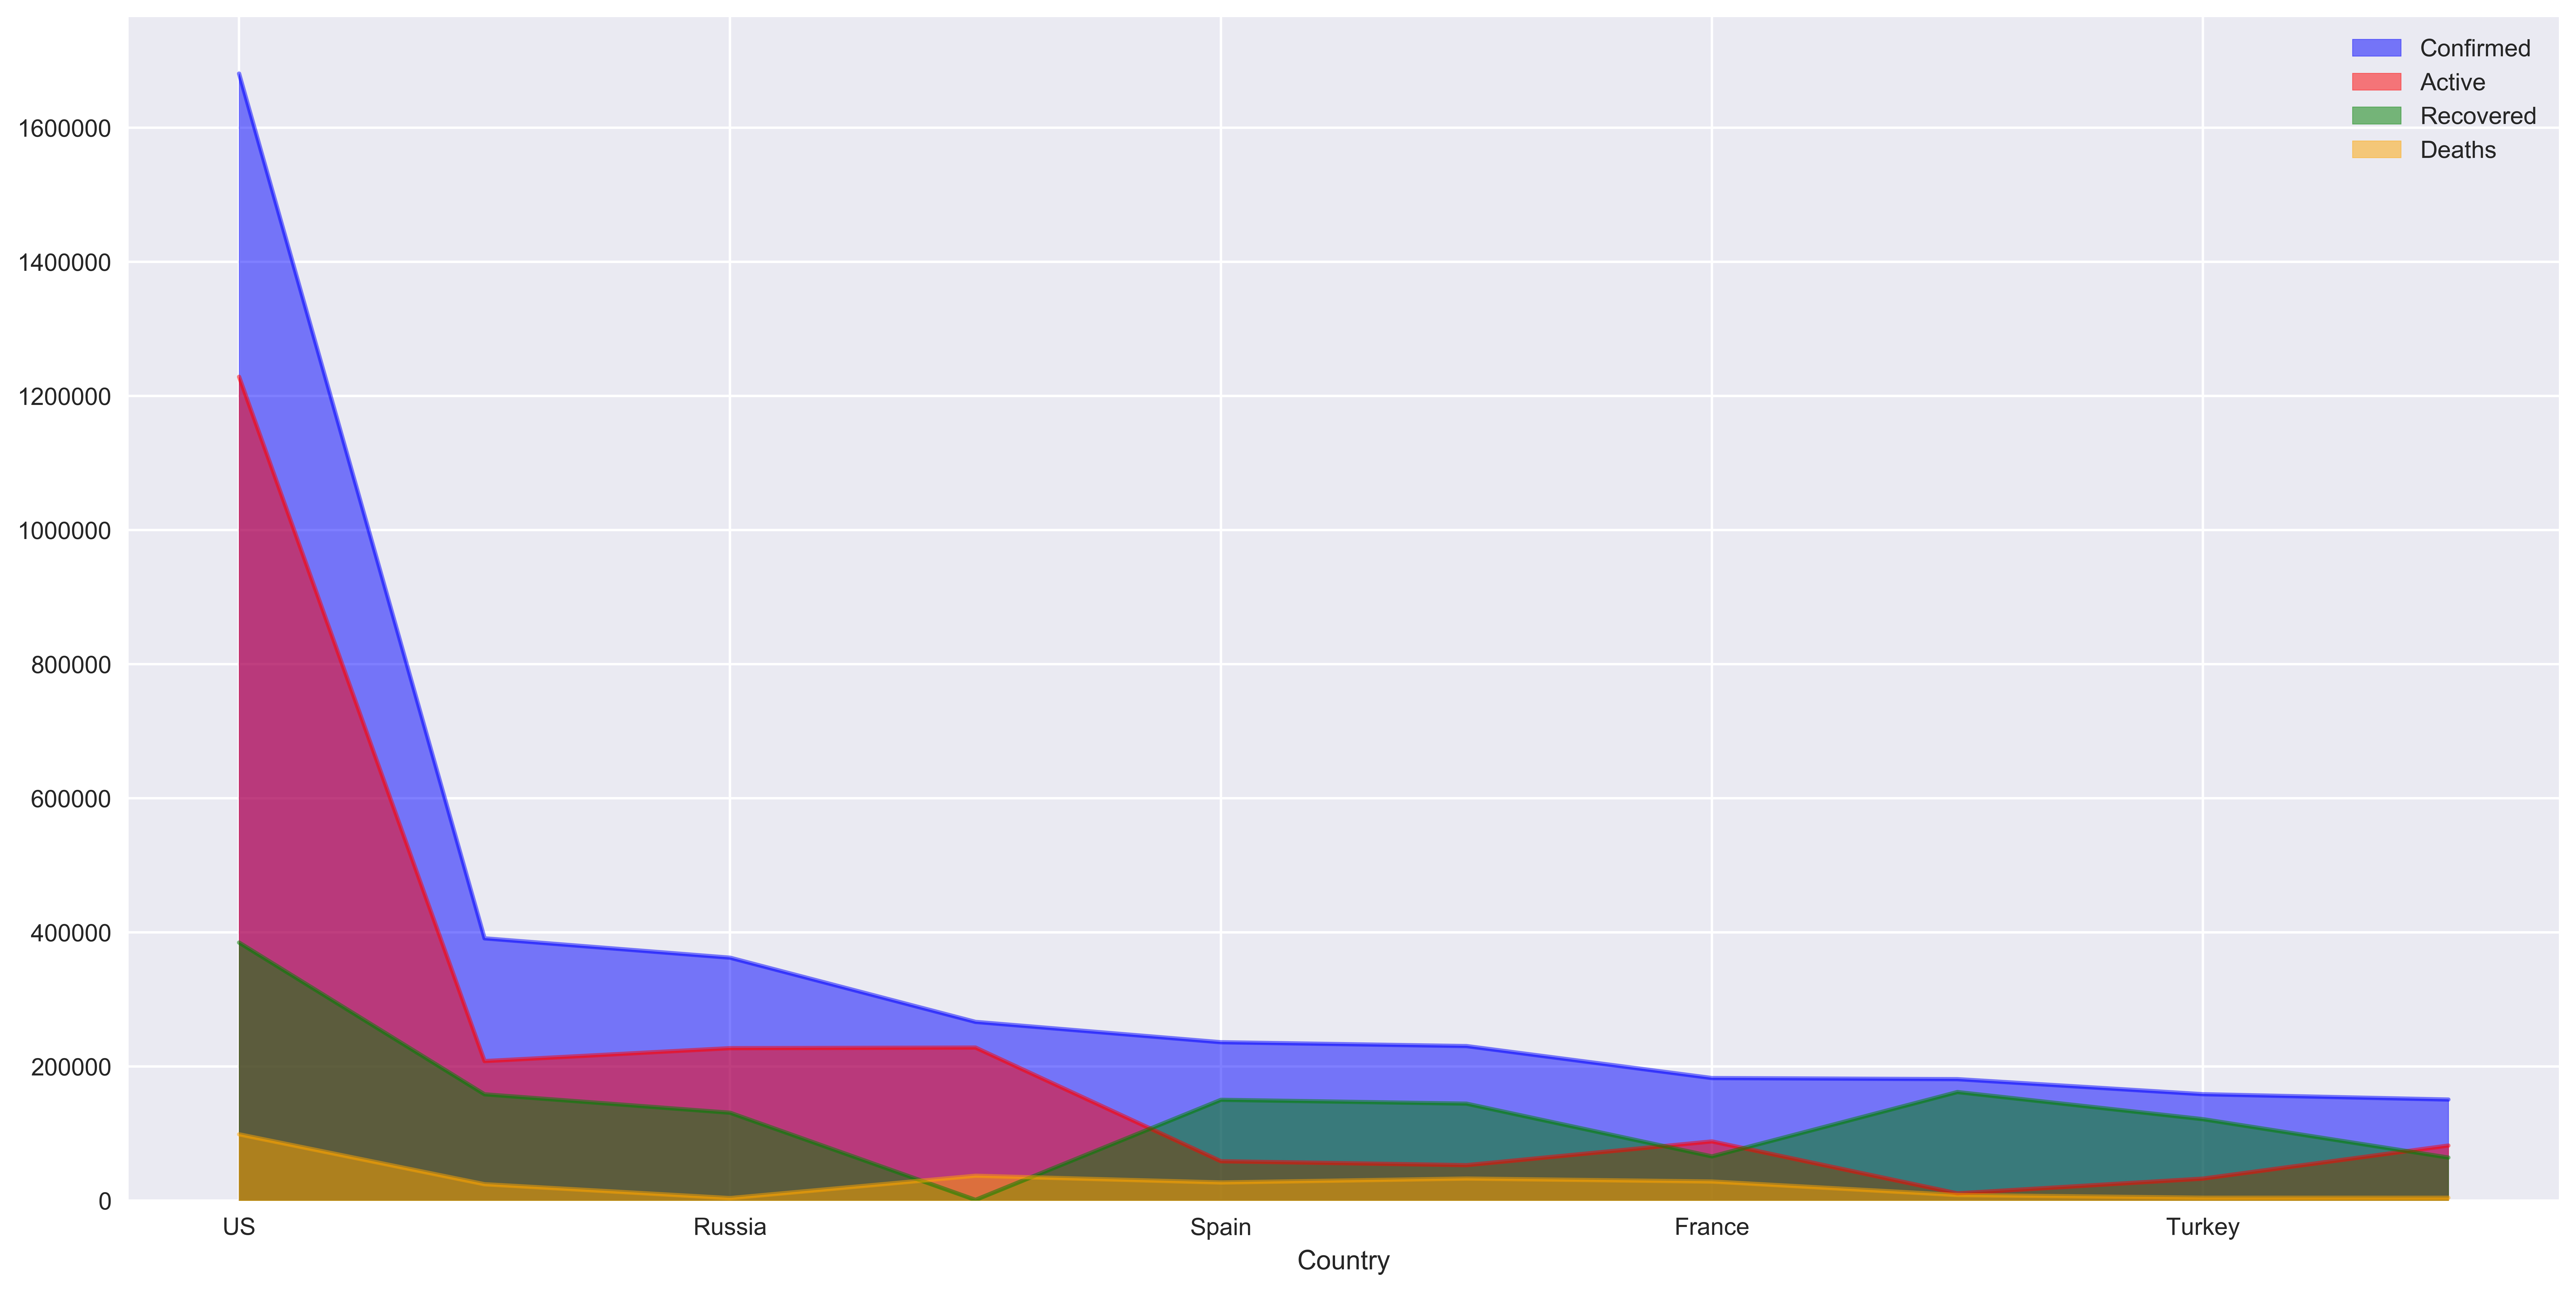

In [102]:
# Топ 8
df_countries_top.plot(kind='area', figsize=(18, 9),stacked=False, 
            color=['blue', 'red', 'green', 'orange']) 
plt.show()

In [103]:
df_countries_top = df_countries_top.reset_index()

In [104]:
sns.pairplot(df_countries_top, 
             vars = ['Confirmed', 'Active', 'Recovered', 'Deaths'], 
             hue = 'Country', diag_kind = 'kde', palette="husl",
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

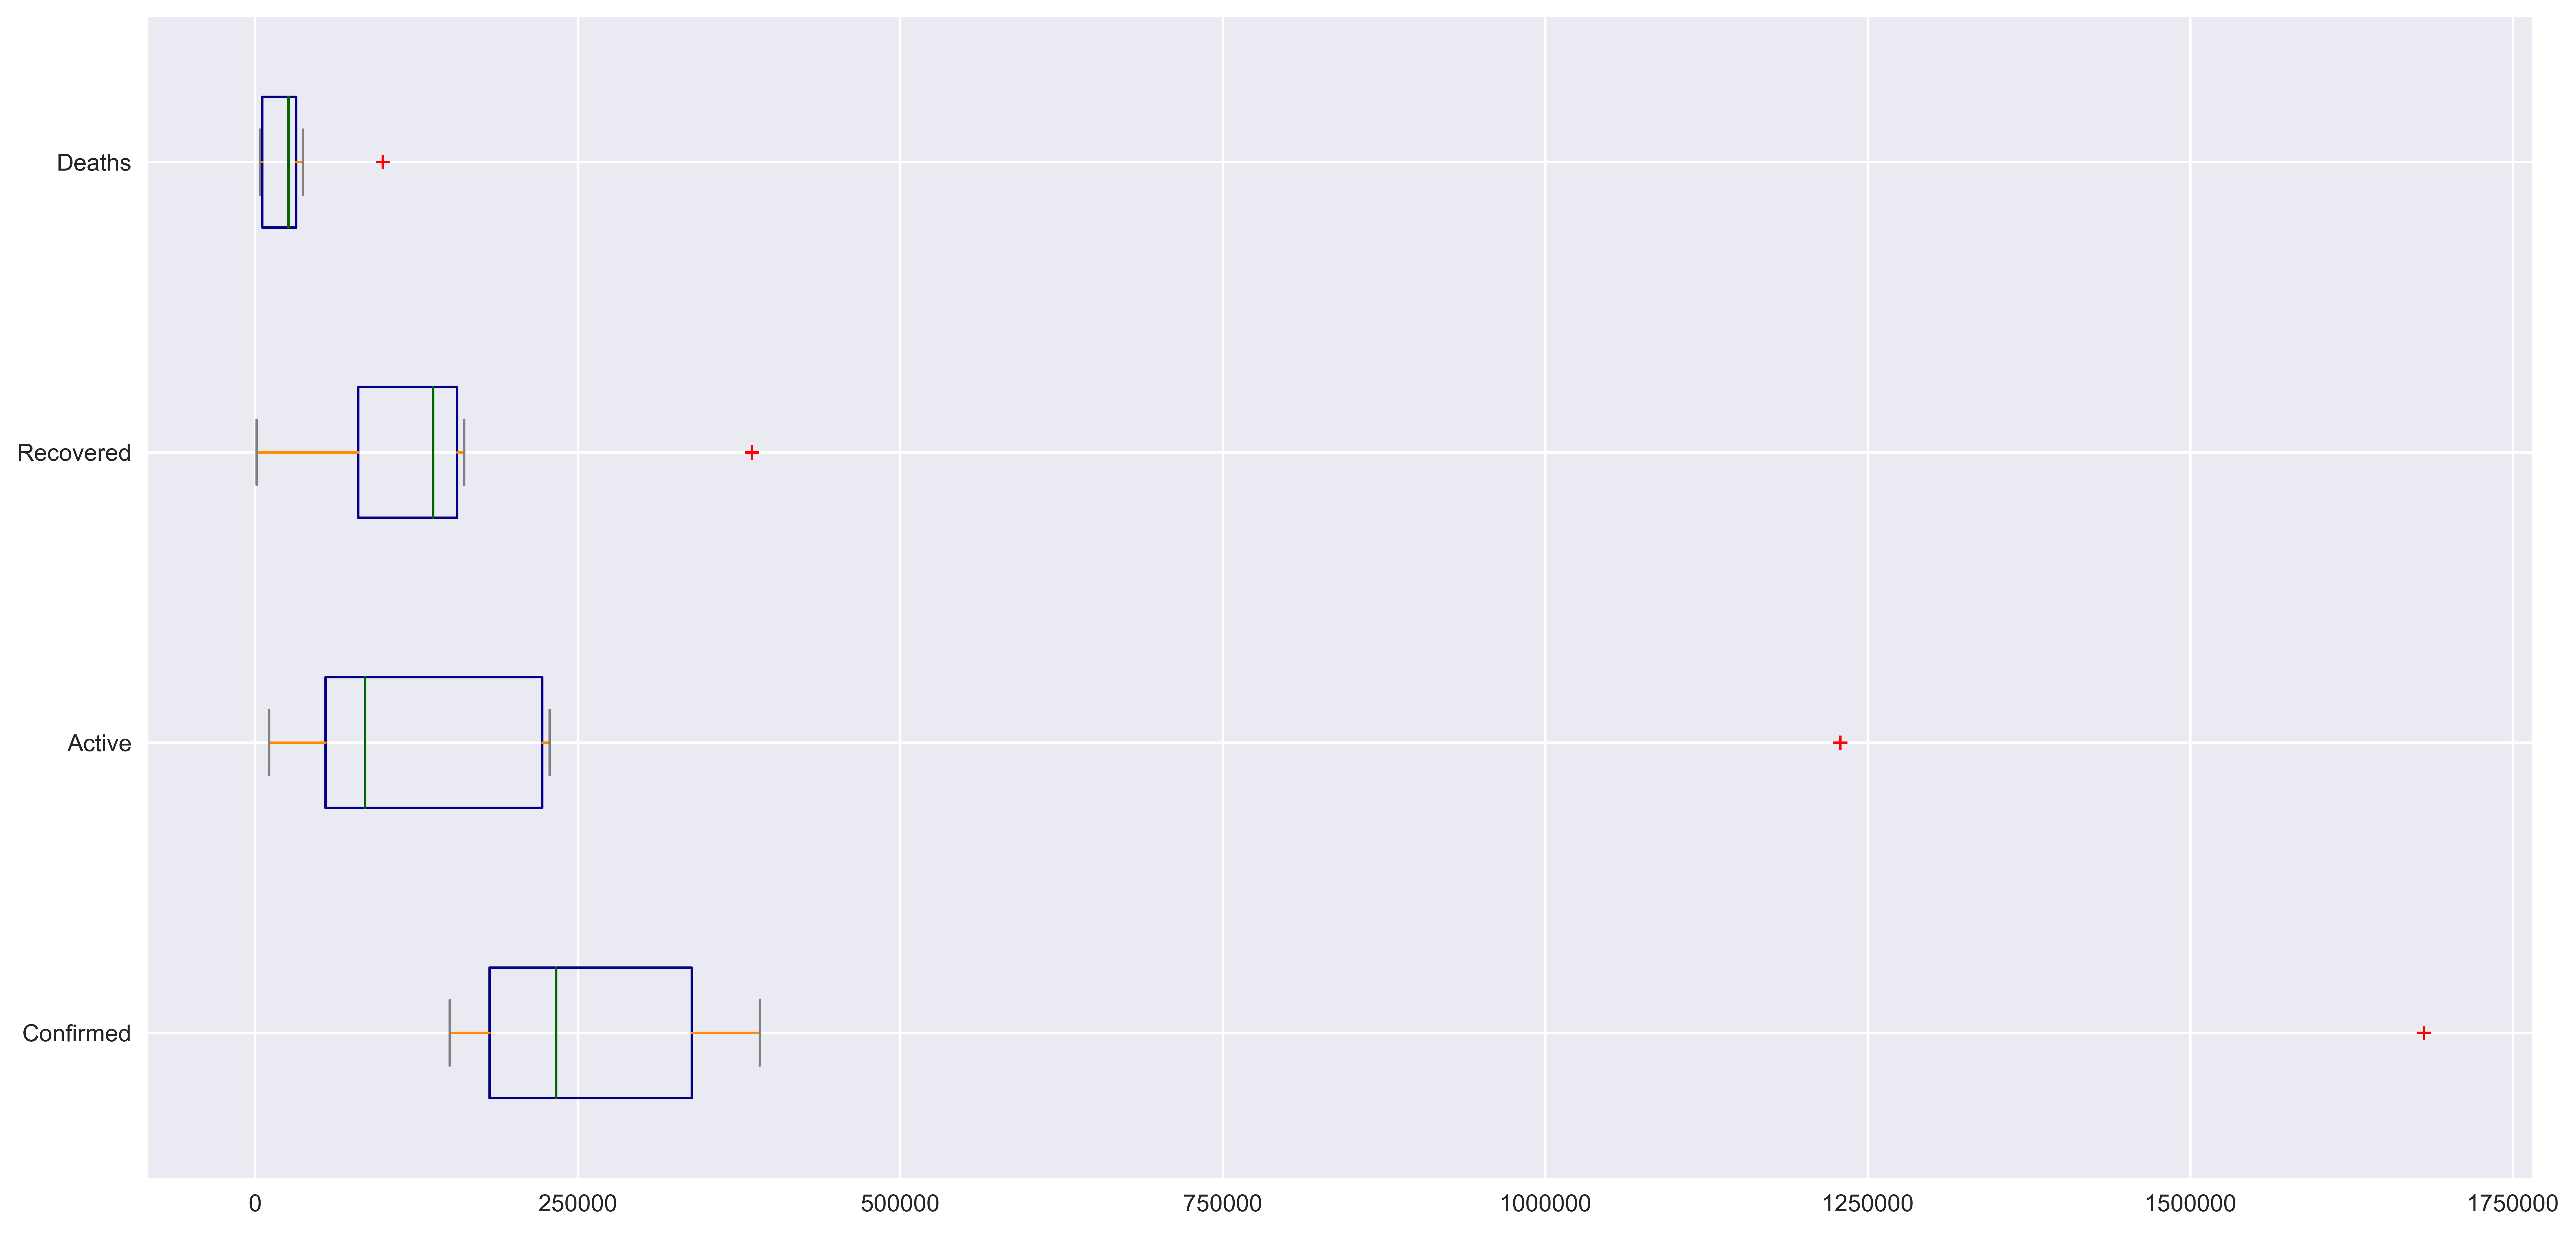

In [105]:
color = dict(boxes='DarkBlue', whiskers='DarkOrange',medians='DarkGreen', caps='Gray')
df_countries_top.plot(kind ='box',notch= False,
          color=color, sym='r+', vert=False ,patch_artist=False,
          figsize=(18, 9))
plt.title('')
plt.show()

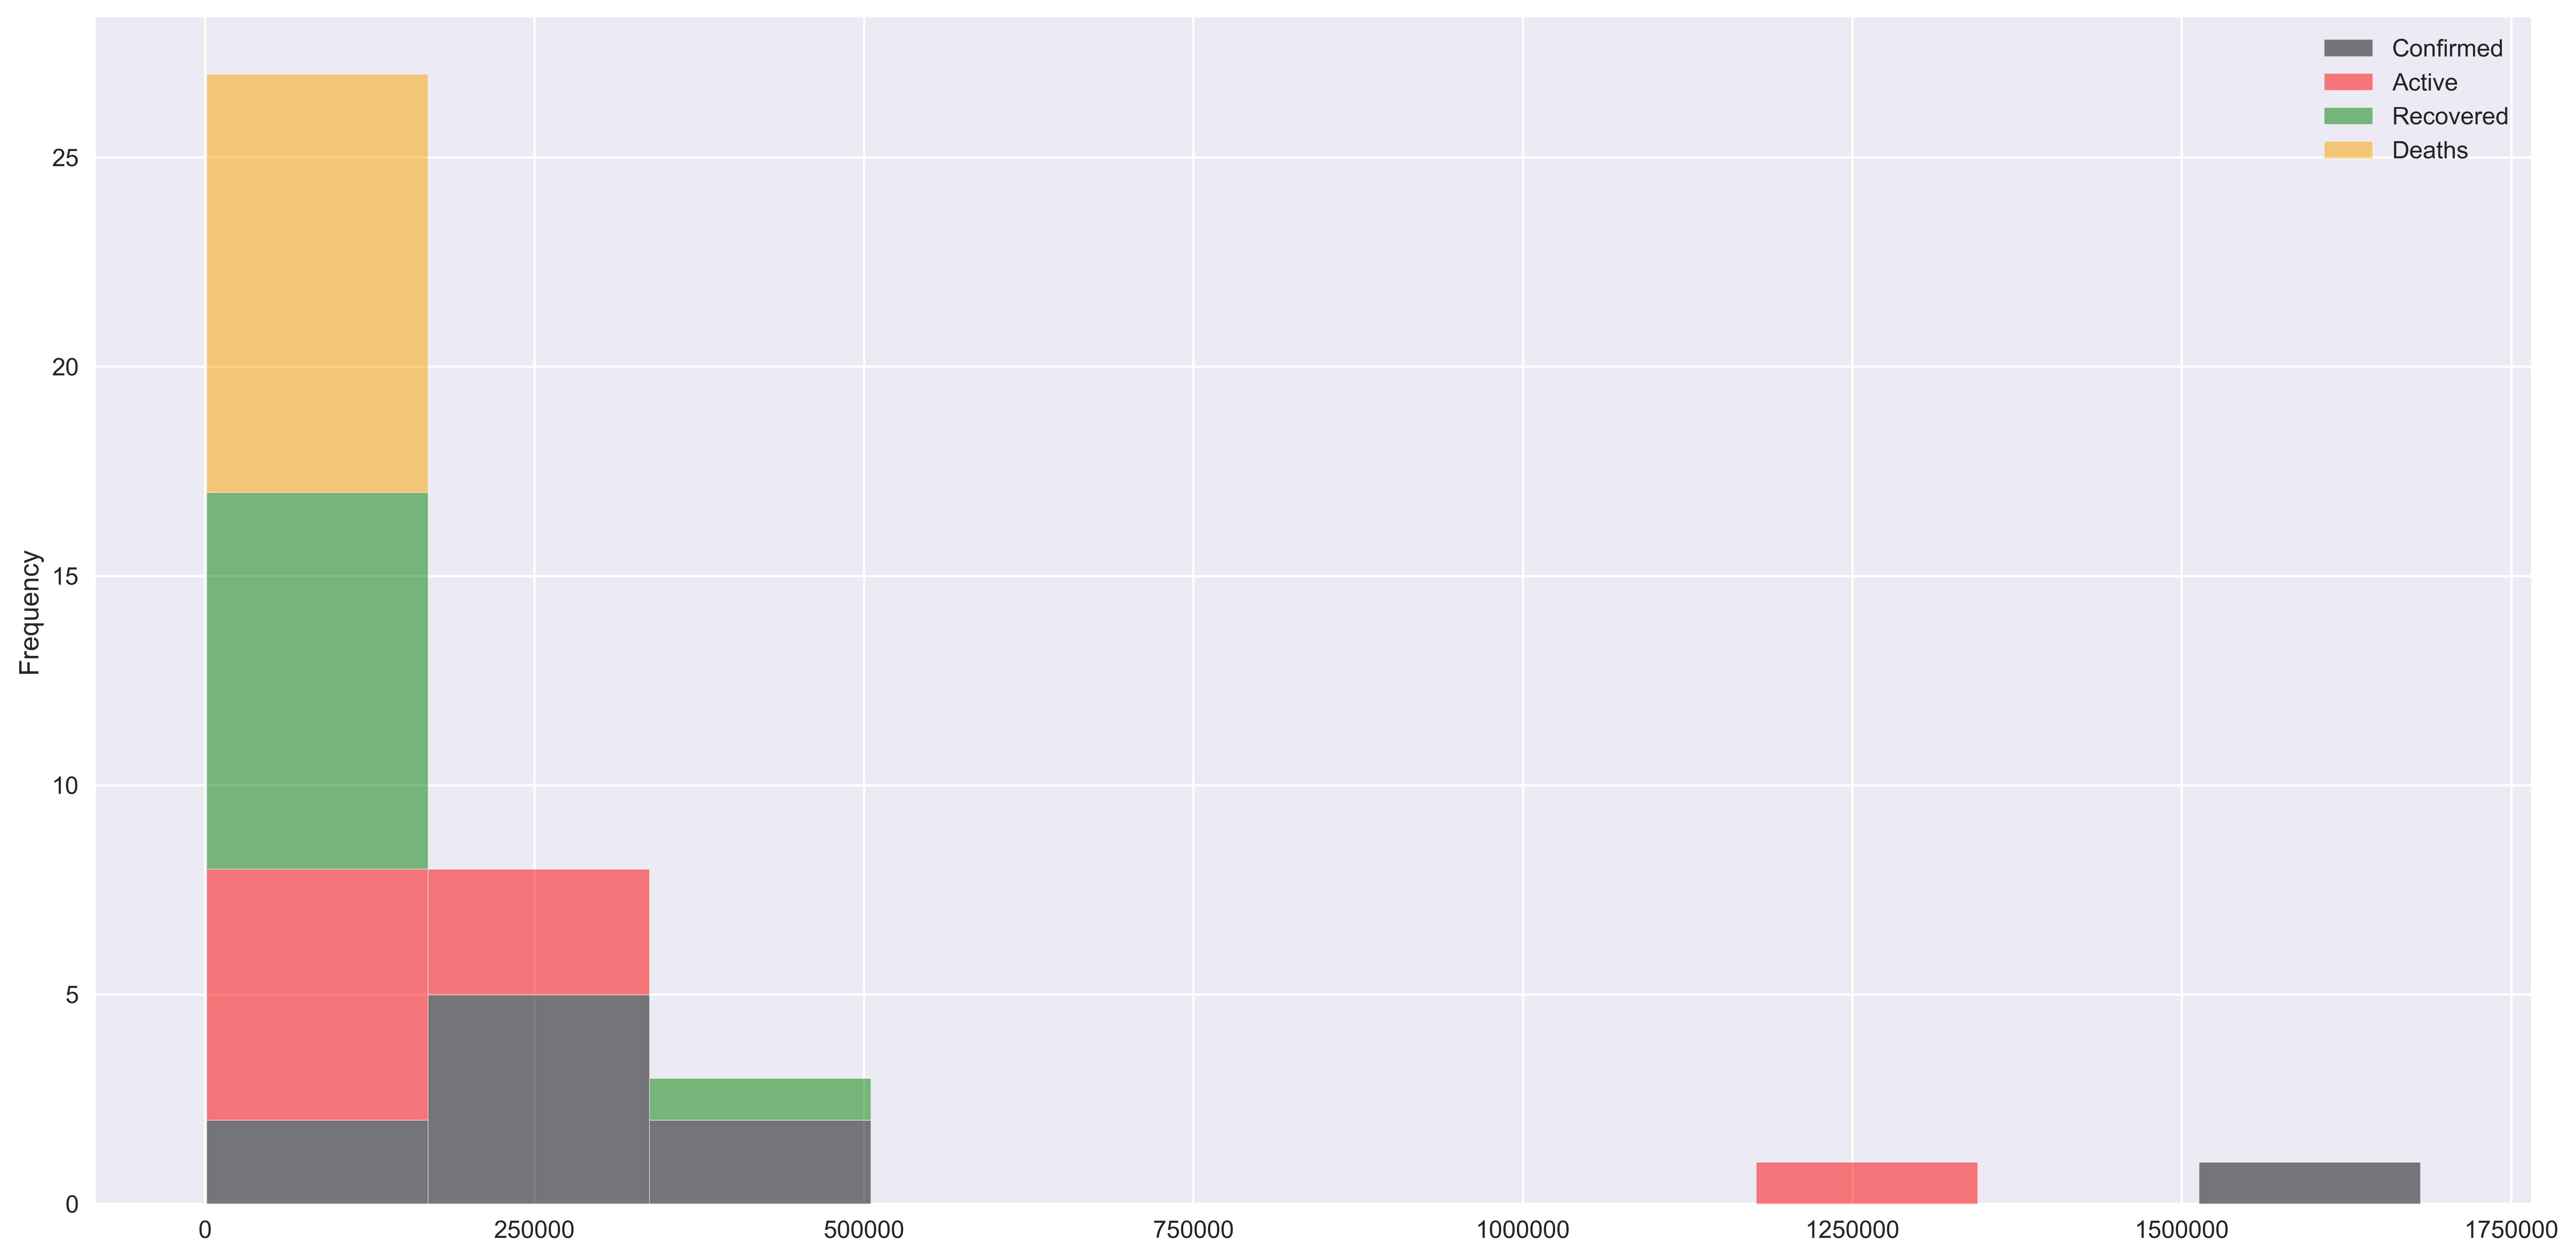

In [106]:
df_countries_top.plot(kind='hist', figsize=(18, 9),stacked=True, 
             alpha=0.5,
            color=['black', 'red', 'green', 'orange']) 
plt.show()